In [7]:
import pandas as pd
import numpy as np 
import seaborn as sns

dfv=pd.read_csv("takehome_user_engagement.csv")
df=pd.read_csv('takehome_users.csv',encoding='latin-1')

### creating target variables 

In [8]:
from datetime import date # converting date and time as only time 
dfv['time_stamp'] = pd.to_datetime(dfv['time_stamp'])
dfv['time_stamp'] = dfv['time_stamp'].dt.date


gk = dfv.groupby('user_id')# grouping separate users 


un=np.unique(dfv['user_id'])# users logged in at least once 

a=[]
for i in (df['object_id']):
    if i in un:
        if len(gk.get_group(i)) > 3:
            a.append(1)
        else:
            a.append(0)
    else:
        a.append(0)
        
df['adopted_user']=a

In [3]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [4]:
df=df.drop(['object_id','name','email'], axis=1)

In [5]:
df.isnull().sum()

creation_time                    0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted_user                     0
dtype: int64

In [6]:
df["invited_by_user_id"].fillna(0, inplace = True)
df["last_session_creation_time"].fillna(0, inplace = True)

In [7]:
a=df[df["invited_by_user_id"]>0]
a=a['invited_by_user_id']
df["invited_by_user_id"] = df["invited_by_user_id"].replace([a],1)

In [8]:
df = df.drop_duplicates()

In [9]:
df.dtypes

creation_time                  object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted_user                    int64
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["creation_time"]=LE.fit_transform(df["creation_time"])
df["last_session_creation_time"]=LE.fit_transform(df["last_session_creation_time"])
df["creation_source"]=LE.fit_transform(df["creation_source"])

In [11]:
X=df.iloc[:,[0,1,2,3,4,5,6]]
y=df.iloc[:,7]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
y_pred
#print(y_pred[0:5])

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dt.predict(X_test) 

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)

roc_auc_score(y_test, y_pred)


0.958314525510747

In [15]:
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60]:
    
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train) # the model is trained
    trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
    dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
    valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.8992708333333334  Cross val score :  0.89875
Depth  :  2  Training Accuracy :  0.9345833333333333  Cross val score :  0.9320833333333335
Depth  :  3  Training Accuracy :  0.9396875  Cross val score :  0.9367708333333334
Depth  :  4  Training Accuracy :  0.940625  Cross val score :  0.9370833333333334
Depth  :  5  Training Accuracy :  0.9480208333333333  Cross val score :  0.943125
Depth  :  6  Training Accuracy :  0.9554166666666667  Cross val score :  0.9477083333333333
Depth  :  7  Training Accuracy :  0.956875  Cross val score :  0.9481249999999999
Depth  :  8  Training Accuracy :  0.9664583333333333  Cross val score :  0.9529166666666666
Depth  :  9  Training Accuracy :  0.9703125  Cross val score :  0.9558333333333333
Depth  :  10  Training Accuracy :  0.978125  Cross val score :  0.9613541666666666
Depth  :  20  Training Accuracy :  0.9998958333333333  Cross val score :  0.9665625000000002
Depth  :  30  Training Accuracy :  1.0  Cross val score

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from matplotlib import pyplot
dt = DecisionTreeClassifier(max_depth = 3)
# Fit dt to the training set
dt.fit(X_train, y_train)
importance = dt.feature_importances_
#pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,X_test.columns)) # it calculates the feature importances based on IG

[(0.33840777156055357, 'creation_time'),
 (0.0, 'creation_source'),
 (0.6615922284394465, 'last_session_creation_time'),
 (0.0, 'opted_in_to_mailing_list'),
 (0.0, 'enabled_for_marketing_drip'),
 (0.0, 'org_id'),
 (0.0, 'invited_by_user_id')]

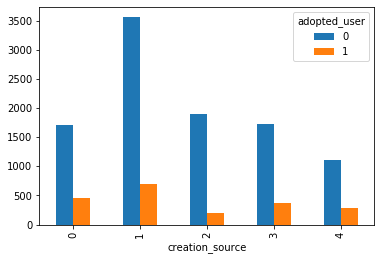

In [17]:
CrosstabResult=pd.crosstab(index=df['creation_source'],columns=df['adopted_user'])
CrosstabResult.plot.bar()

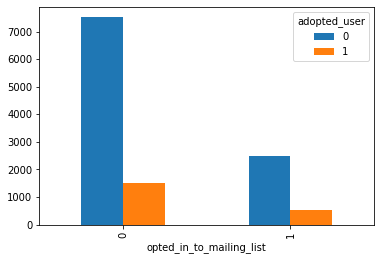

In [18]:
CrosstabResult=pd.crosstab(index=df['opted_in_to_mailing_list'],columns=df['adopted_user'])
CrosstabResult.plot.bar()